# Random Data and Sampling 

In this final section, we will talk about random data and sampling. A lot of fun can be had with random data, especially when creating Monte Carlo simulations and games. 

We will learn some basic random operations and then talk about probability distributions and simulations. 

## Why Use Random Data? 

Using randomized data comes up a lot in data science and machine learning. In stochastic gradient descent, we train machine learning models iteratively and randomly sample one or mofrom numpy import random

x = random.rand()

print(x)re datapoints from a dataset in a loop. This is done because traversing an entire dataset in a loop is computationally expensive. We also see randomness used in other optimization algorithms, like hill climbing and simulated annealing. 

We can also use random data for Monte Carlo simulations, meaning we use random data to model real-life events.

It is important to note that a **random number** is not generating a different number every time. Random means something that can not be predicted logically. Given that computers are logical machines, it is hard to reason how they can produce random numbers. Fortunately there are events like mouse movements, keystrokes, network data, system temperature, etc that can help produce **pseudo-random numbers**. Of course, when we use random numbers for cryptography and security there are concerns if the numbers are "random enough" but for our purposes of data science, these will be just fine. 

## Generating Random Numbers

To generate a random value between 0 and 1, we can use the `rand()` function inside the `random` package. 

In [1]:
from numpy import random

x = random.rand()

print(x)

0.43327516096110086


You can also generate random values as arrays. 

In [5]:
random.rand(10)

array([0.86471789, 0.09232875, 0.61160001, 0.2255342 , 0.09191982,
       0.23998885, 0.96311939, 0.63955302, 0.55370427, 0.10073828])

In [6]:
random.rand(3,3)

array([[0.53058354, 0.39299023, 0.49832956],
       [0.18252139, 0.19234588, 0.6260224 ],
       [0.92645105, 0.21918684, 0.54714236]])

To use a different range between `a` and `b`, you can rescale the 0 and 1 to between that range. 

In [15]:
a,b = 5,10 
a + random.rand()*(b-a)

7.868489298104468

You can also just use the `uniform()` function and specify `low` and `high` as well as any dimensional arguments through the `size` parameter. 

In [20]:
random.uniform(low=5, high=10, size=(3, 3))

array([[9.71263241, 9.04219187, 8.60949481],
       [6.42117743, 5.02409632, 5.49641781],
       [7.89836869, 8.17329716, 9.61899516]])

To generate random integers, use `randint()` in a similar manner. 

In [24]:
random.randint(low=5, high=10, size=(3,3), dtype=int)

array([[7, 9, 9],
       [6, 9, 8],
       [9, 7, 6]])

## Generating Data from Probablility Distributions

We saw earlier that we could generate data from a uniform distribution using `uniform()`, where any number in a range is equally likely. We can also use other probability distributions. These include, but are not limited to: 

* Normal
* Binomial
* Exponential
* Poisson
* Chi Square

We will cover a few of these for good measure. 

## Normal Distribution

The **normal distribution** is a symmetrical, bell-shaped curve that appears in many natural and scientific phenomena. Even for data that does not follow the normal distribution, it still generalizes to a normal distribution due to the central limit theorem. 

Below we use matplotlib to plot the normal distribution's **probability density function (PDF)** which is the bell shaped curve showing how likely we expect each value (in hours). The probability density function (PDF) formula for a normal distribution is defined as...

$ \Large f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $ 

where $ \mu $ is the mean, $ \sigma $ is the standard deviation, $ x $ is the input variable, and $ f(x) $ is the outputted likelihood. 

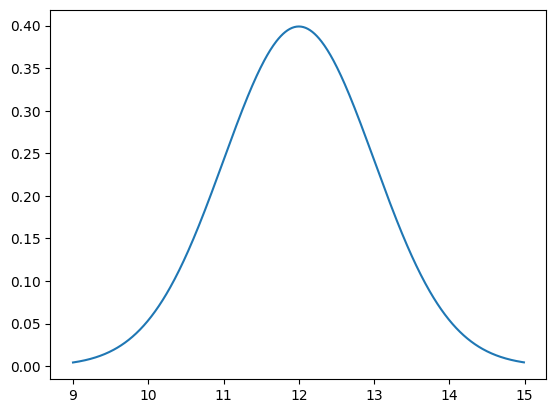

In [4]:
from scipy.stats import norm
import numpy as np 
import matplotlib.pyplot as plt

# define mean and standard deviation
mean = 12
std = 1

# have axis range capture ± 3 standard deviations around mean 
x_range = np.arange(mean-std*3, mean+std*3, .01) 

# plot the normal PDF 
plt.plot(x_range, norm.pdf(x_range, mean, std)) # bell curve 
plt.show()

**There are a couple of important properties surrounding the normal distribution.**

* It is symmetrical down the center. 
* The top of the bell curve, the highest likelihood is at the mean.
* How "spread out" the the tails are is defined by standard deviation.
* The tails forever approach the x-axis but never reach it. 
* The area under the whole curve, like any probability distribution, is 1.0.

For our purposes though, we want to generate random data off the normal distribution. We can do this easily by using the `normal()` functin inside the `random` package in NumPy. The mean is going to be `loc`, the standard deviation is going to be `scale`, and the `size` is the sample size to generate. 

In [5]:
import numpy as np 

x = np.random.normal(loc=12, scale=1, size=10)
x

array([12.75593805, 11.77395323, 11.95958776, 11.66696182, 14.2147845 ,
       11.7067573 , 10.54054934, 11.25547649, 13.59589696, 13.06983001])

## Binomial Distribution

the **binomial distribution** which measures out of *n* trials, what is the probability for seeing *k* successes/events given *p* probability? Let's say we are testing how water-resistant a new smartphone we are developing is. I want to know how likely it is with a 90% success rate, we would see 8 working smartphones out of 10 that fell into a bucket of water. We can achieve this using the binomial. Below, we declare a binomial distribution in SciPy and specify the `k`, `n` and `x` value the last which will be 8 through the `pmf()` function. 

In [6]:
from scipy.stats import binom

# Set the number of trials and probability of success
n = 10
p = 0.9

# Calculate the probability mass function (PMF)
y = binom.pmf(8, n, p)

print("What is the probability of 8 working devices out of 10?")
print(y) # 0.1937102445

What is the probability of 8 working devices out of 10?
0.1937102445


Now what if we wanted to randomly generate an outcome from the binomial distribution? I want to generate a number of successes based on 10 trials with 80% probability of success. I can do this with NumPy's `random` package using `binomial()`.  

In [8]:
import numpy as np

x = np.random.binomial(n=10, p=.9, size=1)
x

array([8])

I can also do this 25 times, where I simulate 25 instances of a random outcome where each has 10 trials.

In [10]:
import numpy as np

x = np.random.binomial(n=10, p=.9, size=25)

print(x)

[10 10  9  9 10 10 10  8 10  9  7  8  9  8  7  8  9 10  9  9  9  7  9  8
  9]


## Exponential Distribution 

Another useful continuous distribution is the **exponential distribution**, which is often used to model how much time occurs between events given an average duration. The formula for the probability density function of an exponential distribution is...

$ \Large f(x) = \lambda e^{-\lambda x} $ 

where $ \lambda $ is the average number of events to occur in a defined period. Let's say we release a YouTube video and we expect it will there will be on average 2 views every minute. How much time can we expect to occur between each view? This is what the exponential distribution helps us answer. 

Let's plot using SciPy as shown below. Note we have to input the lambda rate through the `scale` argument as $ \frac{1}{\lambda} $. 

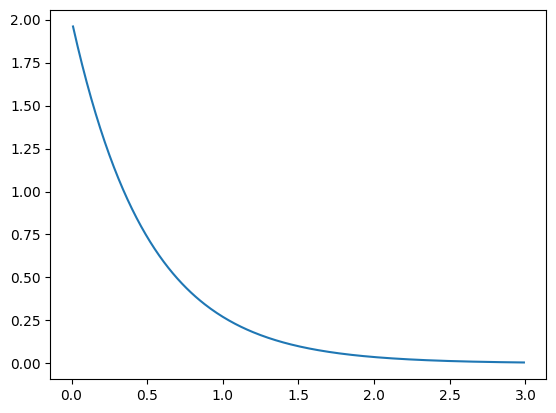

In [12]:
from scipy.stats import expon 

lambda_rate = 2 # mean views per minute 

x = np.arange(.01, 3, .01)
y = expon.pdf(x, scale = 1/lambda_rate)

plt.plot(x, y)
plt.show()

And of course, we can generate random data off the exponential distribution using `NumPy`. Here is a simulated example of generating the time between the next 30 views in minutes. 

In [13]:
import numpy as np

lambda_rate = 2

x = np.random.exponential(scale=1/lambda_rate, size=30)
x

array([0.62083284, 0.64259096, 0.27850319, 0.07424723, 0.01633999,
       0.39575259, 0.09916758, 1.0770306 , 0.37934075, 0.09381953,
       0.37325681, 0.08274741, 0.3758932 , 0.19359112, 0.46936841,
       0.29693754, 0.39916784, 1.33316552, 0.64720564, 0.11775009,
       1.07262494, 0.54688222, 0.1187243 , 0.68427811, 0.50774047,
       0.81900561, 0.01493657, 0.23224083, 0.46258057, 0.44051229])

There are many, many other probability distributions available in NumPy to use. But this hopefully gives you an idea of what patterns to expect for both discrete (e.g., the Binomial Distribution) and continuous (e.g., the normal and exponential distributions). Let's learn about randomized data selection next. 

## Randomly Selecting Data 

## Monty Hall Problem with Monte Carlo

A **monte carlo** simulation is a type of model that uses randomized data to understand something in the real world. You may have heard of the Monty Hall Problem, a famous probability problem originally framed on the game show *Let's Make a Deal*. The problem structures a contestant choosing between 3 doors, where 1 has the prize and the other two have goats. 

img

Things get interesting though after the contestant chooses a door. Let's say they choose door #1. The game show host (who knows which door has the prize) opens one of the other doors to reveal a goat. 

img

The contestant is now given the opportunity to switch to the other unopened door. So the question is does the contestant improve their probability by switching or staying? 

Back in the 1990's, [a columnist named Marilyn vos Savant](https://priceonomics.com/the-time-everyone-corrected-the-worlds-smartest/) caused quite a stir in the scientific community. She proposed that a contestant doubles their chances by switching, shifting from a probability of $ \frac{1}{3} $ to $ \frac{2}{3} $. The mathematics and scientific community adamantly, publicly, and viciously told her she was wrong. However, she was proven right.

img

We could use Bayes Theorem to prove Marilyn is correct, and I encouraged doing that exercise! However, I want to focus on Monte Carlo simulations as a vehicle for this kind of discovery. With our "Monte Carlo Monty Hall" simulation, we will show empirical evidence that switching indeed doubles the contestant's chance of winning. 

The Python code below will generate 100 random Monty Hall games (specified by the `trial_cnount`). On each game, it will randomly select the prize door and the contestant's selected door. The opened door will be the door that was not selected nor has the prize. The switch door will be the door that was not selected nor was opened. We will keep track of how often wins will occur by staying versus switching. 

In [95]:
import numpy as np 

n = 100

prize_doors = np.random.choice(3, n)
chosen_doors = np.random.choice(3, n)

In [96]:
prize_doors

array([2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 2,
       2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1,
       2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0,
       2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [97]:
chosen_doors

array([0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0,
       2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 0, 2,
       1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0,
       2, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 1])

In [98]:
opened_doors = np.zeros(n, dtype=int) 

for i in range(n): 
    doors = np.arange(0,3)
    opened_doors[i] = np.random.choice(
        doors[(doors != prize_doors[i]) & (doors != chosen_doors[i])]
    )

opened_doors

array([1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2,
       0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1,
       0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2])

In [99]:
switch_doors = np.zeros(n, dtype=int) 

for i in range(n): 
    doors = np.arange(0,3)
    switch_doors[i] = np.random.choice(
        doors[(doors != chosen_doors[i]) & (doors != opened_doors[i])]
    )

switch_doors

array([2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 0, 2,
       0, 1, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0,
       2, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1,
       2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [100]:
stay_wins = np.sum(chosen_doors == prize_doors) 
switch_wins = np.sum(switch_doors == prize_doors)

print(f"STAY WINS: {stay_wins}")
print(f"SWITCH WINS: {switch_wins}")

STAY WINS: 34
SWITCH WINS: 66
